<a href="https://colab.research.google.com/drive/1XxucdT4RD8OX7CfctRZtzAx-XQx9HjHb?authuser=1">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Linear Regression with Single Variable
## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
np.random.seed(2)

## What is Regression?
In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors' or 'features').
<br><br>
In simple terms, regression is a method by which we find a relationship of one or several variable with a outcome variable whose value is of our interest. We want to establish a way by which we can predict the outcome variable from the given set of variables. It is finding an equation given all variables but no coefficients. We want to find the value of coefficients such that our equation give acceptable outcome.
<br>
## Linear Regression
The most common form of regression in machine learning is linear regression, in which our model tries to finds the line that most closely fits the data.
<br>
In simple linear regression where the number of predictor variables is one and there is a linear relationship between the predictor $(x)$ and outcome $(y)$ variable.
<br><br>
A typical linear regression plot looks as below, 
<img src="./imgs/linearreg.png" width=500 height=500 /> <br>
The red line is called as Regression Line. The Linear regression model tries to fit a line such that it passes maximum data points.
<br><br>
## Cost Function
In Machine Learning, cost functions are used to estimate how badly models are performing.Put simply, a cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y.

This is typically expressed as a difference or distance between the predicted value and the actual value. The cost function (you may also see this referred to as loss or error) can be estimated by iteratively running the model to compare estimated predictions against “ground truth” — the known values of y.

The objective of a ML model, therefore, is to find parameters, weights or a structure that minimises the cost function. Their are many cost functions available, in this notebook we will use one known as <b>Mean Squared Error</b>
### Mean Squared Error
It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points.
The most general form of mathematical representation of Machine Learning system is as follows,
<br><br>
$$
\hat{y} = W^T.X
$$
where,
- $\hat{y}$ : Predictions
- $W$ : Model Parameters 
- $X$ : Input Data Points (Predictor Variables)

The Mean squared error is defined as,
$$
J = \frac{1} {n} \sum_{i=1}^{n}(\hat{y}_i - y_i)^2
$$
where,
- $\hat{y}_i$ : Predictions for i-th example
- $y_i$ : Ground Truth for i-th example 
- $n$ : Total num,ber of examples

In Linear regression with one variable, the equation we want to fit to our data looks as,
<br><br>
$$
\hat{y} = w_0 + w_1 . x
$$
<br>
$$
\hat{y} = w_0 . 1 + w_1 . x
$$

where,
- $w_0$ : Intercept of line
- $w_1$ : Slope of line

where, $w_0$ and $w_1$ are model weights. The objective is to find the value of these weights, so that the line produced using those weights best fits our data.
<br><br>
To find the optimal values of weights, we use Gradient Decent optimization. The function to optimize here will be our cost function. So our Objective becomes, `Update $w_0$ and $w_1$ such that the value of cost function is minimum`.

To update $w_0$ and $w_1$, we need to find the gradient of cost function with respect to $w_0$ and $w_1$. This is shown below,
$$
\frac {\partial J}{\partial w_0} = \frac {2} {n} . \sum_{i=1}^n. (\hat{y}_i - y_i) . x_0
$$
<br>
$$
\frac {\partial J}{\partial w_1} = \frac {2} {n} . \sum_{i=1}^n. (\hat{y}_i - y_i) . x_1
$$
the value of $x_0$ is always equal to 1, it is known as intercept of linear regression line and value of $x_1$ will be the value of predictor variable.

The update rule for $w_0$ and $w_1$ is as follows,
$$
w_0 = w_0 - \alpha . \frac {\partial J}{\partial w_0}
$$
<br>
$$
w_1 = w_1 - \alpha . \frac {\partial J}{\partial w_1}
$$
<br>
<b>Okay, enough theory, let's get coding</b>

First we will code the `mean squared error` and `gradient decent` function as below.

In [2]:
def mean_squared_error(target, predicted):
    return np.mean((predicted - target) ** 2)

def gredient_decent(weights, x_values, y_values, predicted, learning_rate=1e-05):
    difference = predicted - y_values
    difference = np.multiply(difference, x_values)
    gradient = np.mean(difference, axis = 0)
    new_weights = weights - learning_rate * gradient.reshape(-1, 1)
    return new_weights

## Toy Example
Let's see how Linear regression works using an artifial dataset as shown below.

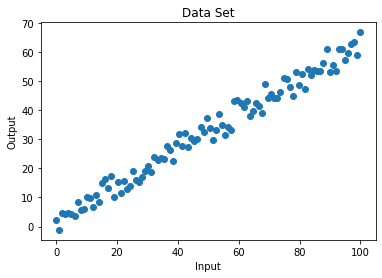

In [3]:
# Sample data for Implementation
x = np.linspace(0, 100, 100)
delta = np.random.uniform(-5, 5, x.size)
y = 0.6*x + 3 + delta

plt.scatter(x, y)
plt.title("Data Set")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [4]:
#Converting data to arrays
x_val = np.ones(shape=(len(x), 2))
y_val = np.array(y).reshape(-1, 1)
x_val[:, 1] = np.array(x).T

weights = np.random.rand(2, 1)
print("Initial weights")
print(weights)

Initial weights
[[0.77800816]
 [0.13395421]]


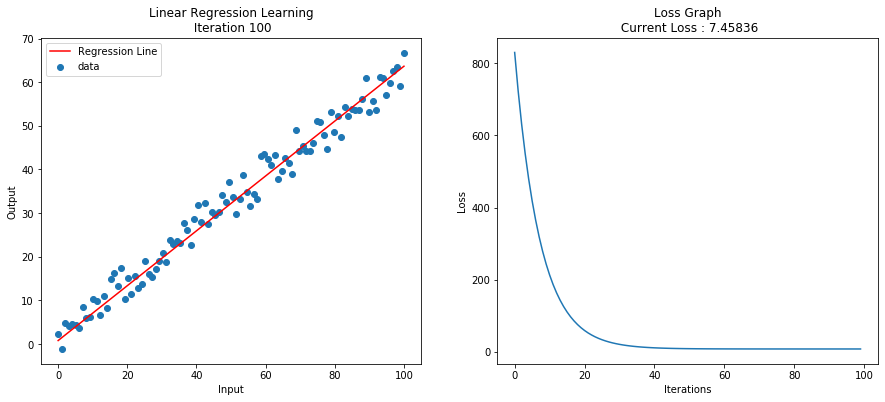

In [5]:
# Visualization code
fig = plt.figure()
fig.set_size_inches(15, 6)
fig.show()
fig.canvas.draw()
fig.canvas.set_window_title('Linear Regression')

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Loss tracking
loss = []

# Main loop
for j in range(1, 101):
    pred = np.matmul(x_val, weights) #<- Prediction
    l = mean_squared_error(pred, y_val) #<- Loss
    loss.append(l) #<- Loss book keeping
    weights = gredient_decent(weights, x_val, y_val, pred, 2e-05) #<- Weights updation
    
    #Visualization updation
    ax1.clear()
    ax2.clear()

    ax1.set_title("Linear Regression Learning\n Iteration {}".format(j))
    ax1.set_xlabel("Input")
    ax1.set_ylabel("Output")

    ax2.set_title("Loss Graph\n Current Loss : {:.5f}".format(l))
    ax2.set_ylabel("Loss")
    ax2.set_xlabel("Iterations")

    ax1.scatter(x, y, label = "data")
    ax1.plot(x, pred, c = 'r', label = "Regression Line")
    ax1.legend(loc="upper left")
    ax2.plot(list(range(j)), loss)
    fig.canvas.draw()
    display.display(plt.gcf())
    display.clear_output(wait=True)

As we saw above, our model gradually learns the correct line for our toy data. Let's get in the real world and see a more practical example.

# Maximize Profit
Suppose you are the CEO of a restaurant franchise and are considering diﬀerent cities for opening a new outlet. The chain already has trucks in various cities and you have data for proﬁts and populations from the cities. You would like to use this data to help you select which city to expand to next. Before starting, let's visualize how the data looks like.
The data is present in the file called `FoodTruckData.txt`. The negative values in data indicate loss.

<b>Note</b>: The dataset is taken from `Stanford machine Learning Course`, link in references.

Text(0.5, 1.0, 'Food truck Data')

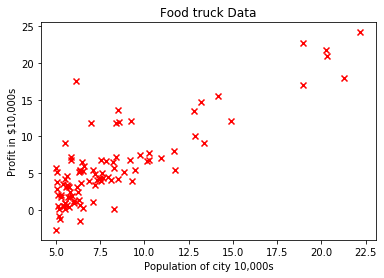

In [6]:
# Loading data
data = np.genfromtxt("FoodTruckData.txt", delimiter=",")

# Plotting data
plt.scatter(data[:, 0], data[:, 1], marker='x', color='r') #<- Scatter plot
plt.xlabel("Population of city 10,000s")
plt.ylabel("Profit in $10,000s")
plt.title("Food truck Data")

Next thing we need is our cost function and gredient decent function. They are as follows,

Let's load our data in seperate variables and initialize weights and hyper-parameters.

You are welcome to alter the weight initial values and hyper-parameters to see their impact on Training process.

In [7]:
# Loading data in seperate X and y value variables
x_values = np.ones((len(data), 2))
x_values[:, 1] = data[:, 0]
y_values = data[:, 1].reshape(-1, 1)

# Initializing weights to zero
weights = np.zeros((2, 1))
# Uncomment below code for random weight intialization and comment line above this comment
# weights = np.random.rand(2, 1)

# Initialize Hyper parameters
learning_rate = 0.015
epoch = 500

Now that's all done, we can start <b>Learning</b>. We are also going to plot the progress of Model alongside with training process.

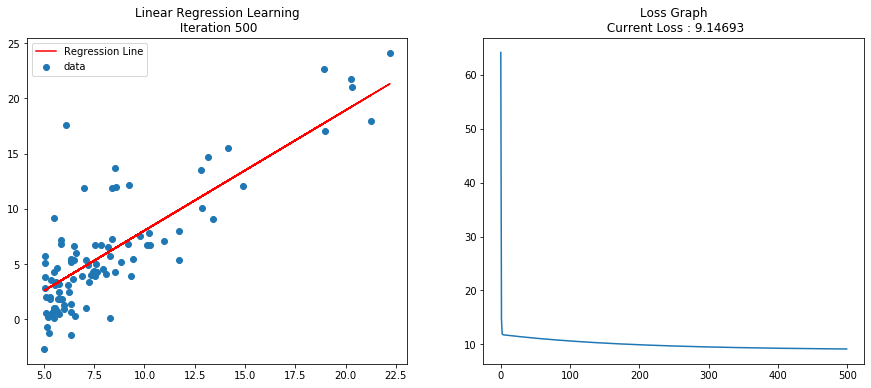

In [8]:
# Plotting details
fig = plt.figure()
fig.set_size_inches(15, 6)
fig.show()
fig.canvas.draw()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_xlabel("Input")
ax1.set_ylabel("Output")

ax2.set_ylabel("Loss")
ax2.set_xlabel("Iterations")

# Initialize book keeping varibles
cost = []

# Running Gredient Decent
for i in range(1, epoch+1):
    pred = np.matmul(x_values, weights) #<- Generate Prediction
    c = mean_squared_error(y_values, pred) #<- Calculate Error
    cost.append(c)
    weights = gredient_decent(weights, x_values, y_values, pred, learning_rate) #<- Update weights
   
    # Update Plots
    ax1.clear()
    ax2.clear()
    ax1.set_title("Linear Regression Learning\n Iteration {}".format(i))
    ax2.set_title("Loss Graph\n Current Loss : {:.5f}".format(c))

    ax1.scatter(data[:, 0], data[:, 1], label = "data")
    ax1.plot(data[:, 0], pred, c = 'r', label = "Regression Line")
    ax1.legend(loc="upper left")
    ax2.plot(list(range(i)), cost)
    fig.canvas.draw()
    display.display(fig)
    display.clear_output(wait=True)

Let's start predicting!

In [9]:
def predict_profit(population):
    x = np.array([1.0, population])
    pred = np.matmul(x, weights)
    print("Profit expected : ${:.3f}".format(pred[0] * 10000))

In [10]:
predict_profit(12.5)

Profit expected : $107545.435
